In [1]:
from glob import glob
import seaborn as sns
from scipy.io import wavfile
import os
from os import path
import h5py
import ephys_util
from ephys_util import butter_bandpass_filter, load_wm, get_spikes, psth_channel, get_onsets, h5_to_wav, load_data_new, truncate_audio_new
from datetime import datetime

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\acquisition\.conda\envs\acquisition\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('talk')

# convert h5 audio to wav

In [3]:
isolation2 = r'D:\acquired_data\2021_09_22_14_35_41_658731__2M_isolation2'

dirnames = [isolation2]

In [4]:
for i in dirnames:
    h5_to_wav(i)

Wrote data to: D:\acquired_data\2021_09_22_14_35_41_658731__2M_isolation2\mic_2021_09_22_14_35_41_658731_mic1.wav
Wrote data to: D:\acquired_data\2021_09_22_14_35_41_658731__2M_isolation2\mic_2021_09_22_15_05_41_737536_mic1.wav
15:07:28- Function h5_to_wav, called by <module>, executed in 7.599s


# get the onsets 

In [5]:
isolation2_onsets = get_onsets(35.933, 65.6, 40, 2)

15:07:28- Function get_onsets, called by <module>, executed in 0.000s


In [6]:
len(isolation2_onsets[:-1])

39

# do analysis

In [7]:
all_onsets = [isolation2_onsets[:-1]]
dirnames = [isolation2]
sr_am, am = wavfile.read('white_sine_2s.wav')
for i in range(len(all_onsets)):
    print('Start:' , datetime.datetime.now())
    dirname = dirnames[i]
    
    sr_phys, data_phys, data_audio, ephys_trigger = load_data_new(dirname, phys_bandpass=(200, 4000))
    
    spikes = get_spikes(data_phys, threshold=4)
    
    
    
    onsets = all_onsets[i]
    
    folder_name = 'psth_am'
    
    if os.path.exists(os.path.join(dirname, folder_name)) == False:
        os.mkdir(os.path.join(dirname, folder_name))

    psth_channel(spikes, am, onsets, ephys_trigger, sr_audio = sr_am,
                 save_fig=True, outname='_am_{}'.format(dirname.split('_')[-1]),
                 savedir=os.path.join(dirname, folder_name), hide_plot=True)
    print('Stop:' , datetime.datetime.now())
    print()
#     psth_channel(spikes, am, onsets, ephys_trigger, sr_audio = sr_am,
#                             save_fig=True, outname='_am_{}'.format(dirname.split('_')[-1]), hide_plot=True)

Start: 2021-10-05 15:07:29.106315
Loading physiology data...
15:08:06- Function load_wm, called by load_data_new, executed in 37.200s
Bandpassing from 200-4000 Hz...
15:08:06- Function butter_bandpass, called by butter_bandpass_filter, executed in 0.003s
15:09:09- Function butter_bandpass_filter, called by load_data_new, executed in 1:03
Computing mean signal across all channels...
Subtracting mean signal across all channels...

Truncating audio...
Ephys trigger detected at analog sample number 3431443

15:09:58- Function truncate_audio_new, called by load_data_new, executed in 0.004s

15:09:58- Function load_data_new, called by <module>, executed in 2:29
15:10:39- Function get_spikes, called by <module>, executed in 40.710s
15:10:39- Function truncate_spikes, called by psth_channel, executed in 0.001s
15:10:39- Function truncate_spikes, called by psth_channel, executed in 0.001s
15:10:39- Function truncate_spikes, called by psth_channel, executed in 0.001s
15:10:39- Function truncate_

## troubleshoot

In [8]:
import ephys_util

In [9]:
audio = am
sr_audio = 125000
pad = 1

all_spikes = []

for onset in isolation2_onsets:

    dur = len(audio)/sr_audio
    offset = onset + dur + pad
    onset = onset - pad
    total_dur = dur + (2*pad)


    spikes_trunc = ephys_util.truncate_spikes(spikes, onset = onset,offset = offset,ephys_trigger=ephys_trigger)
    print(shape(spikes_trunc))
    all_spikes.append(spikes_trunc)

15:14:21- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:14:21- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:14:21- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:14:21- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:14:21- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:14:21- Function truncate_spikes, called by <module>, executed in 0.000s
(64,)
15:14:21- Function truncate_spikes, called by <module>, executed in 0.000s
(64,)
15:14:21- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:14:21- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:14:21- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:14:21- Function truncate_spikes, called by <module>, executed in 0.000s
(64,)
15:14:21- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:14:21- Function truncate_

In [10]:
ephys_trigger/125000

27.451544

In [11]:
isolation2_onsets-(ephys_trigger/125000)

array([   8.481456,   76.081456,  143.681456,  211.281456,  278.881456,
        346.481456,  414.081456,  481.681456,  549.281456,  616.881456,
        684.481456,  752.081456,  819.681456,  887.281456,  954.881456,
       1022.481456, 1090.081456, 1157.681456, 1225.281456, 1292.881456,
       1360.481456, 1428.081456, 1495.681456, 1563.281456, 1630.881456,
       1698.481456, 1766.081456, 1833.681456, 1901.281456, 1968.881456,
       2036.481456, 2104.081456, 2171.681456, 2239.281456, 2306.881456,
       2374.481456, 2442.081456, 2509.681456, 2577.281456, 2644.881456])

In [12]:
(shape(data_phys)[0]/sr_phys) - 1800

-1799.99488

In [13]:
1800 + 872.331 - (27.451544)

2644.879456

In [14]:
shape(spikes_trunc)

(64, 0)

In [15]:
for i in range(64):
    ch = np.vstack(all_spikes)[:,i]
    print(i)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 64 and the array at index 22 has size 0

In [ ]:
len(all_spikes)

In [ ]:
pad

# psth plots

In [16]:
psths_iso2 = np.load(glob(path.join(isolation2, r'psth_am/*.npy'))[0], allow_pickle=True)

C:\Users\acquisition\.conda\envs\acquisition\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


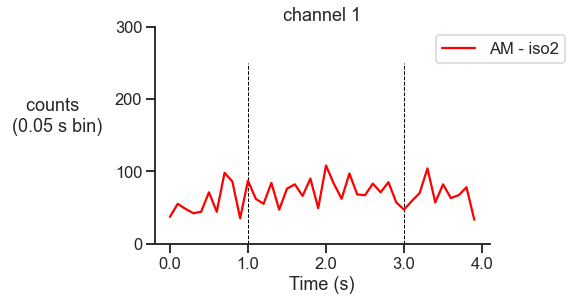

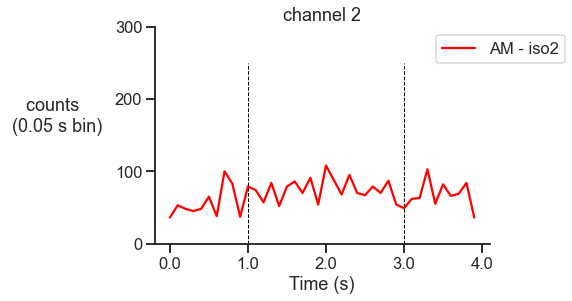

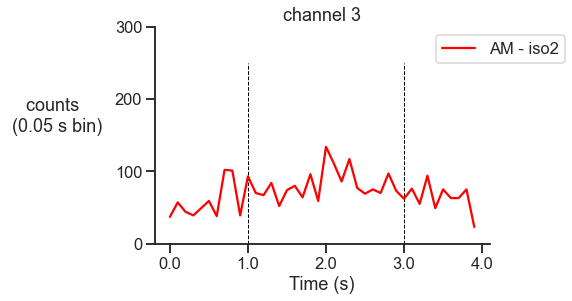

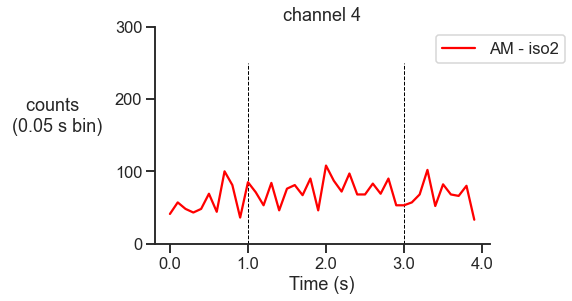

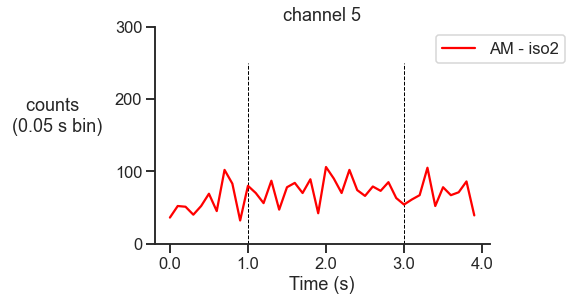

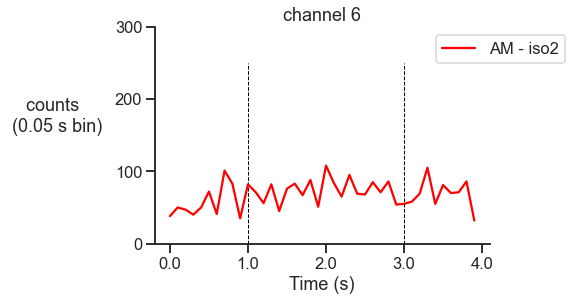

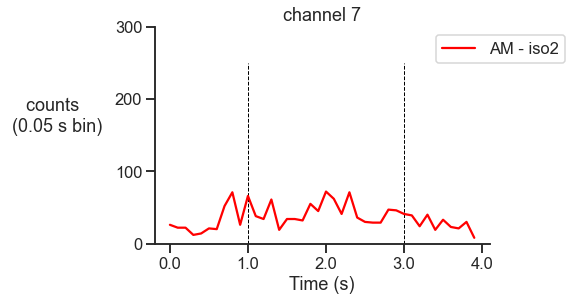

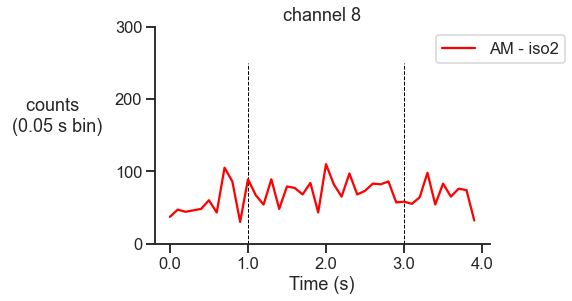

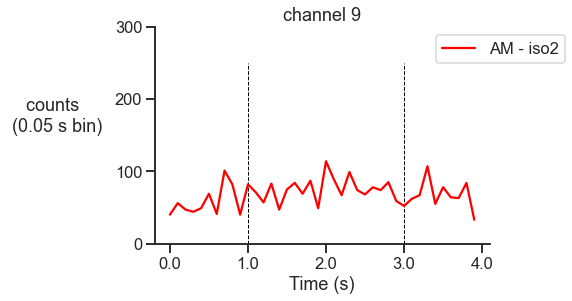

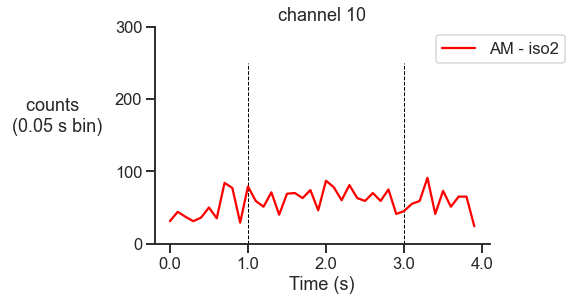

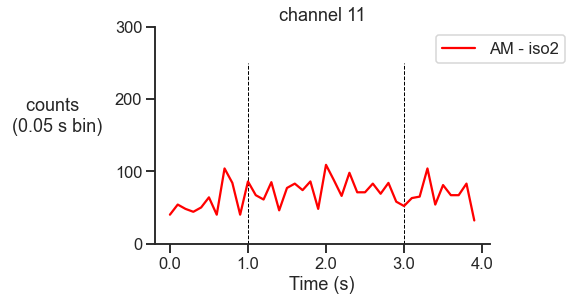

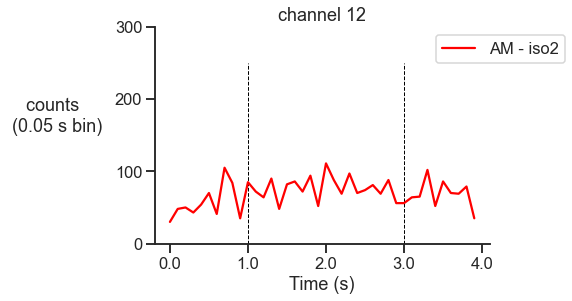

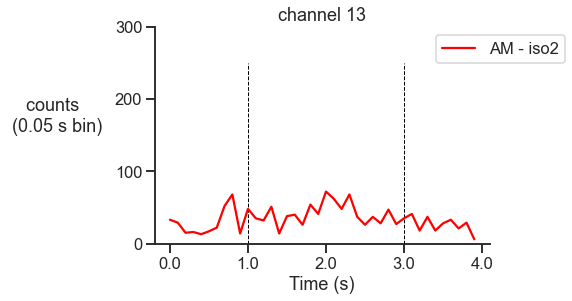

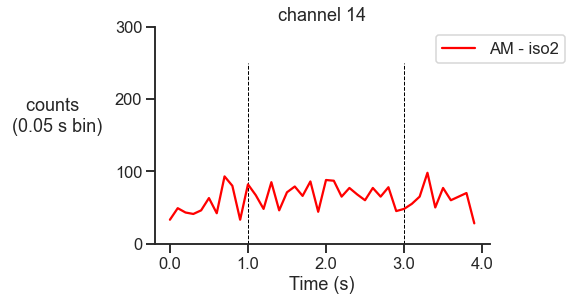

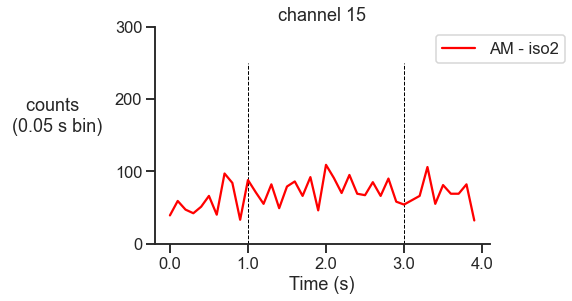

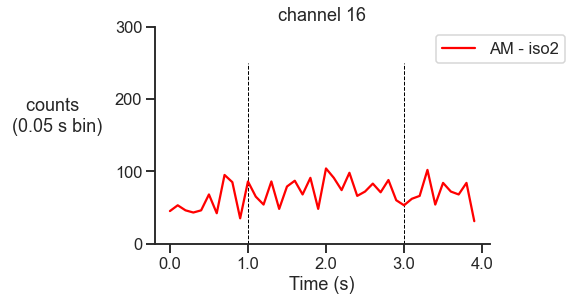

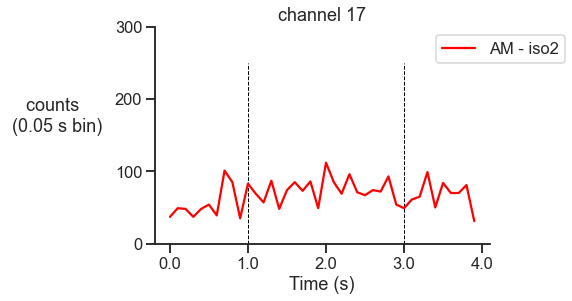

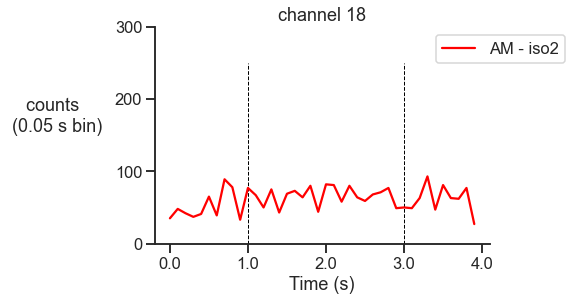

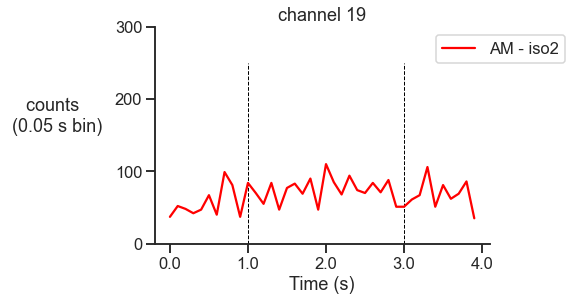

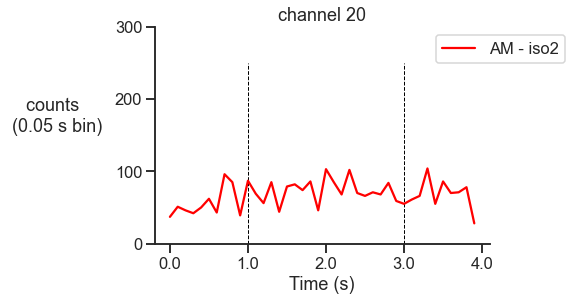

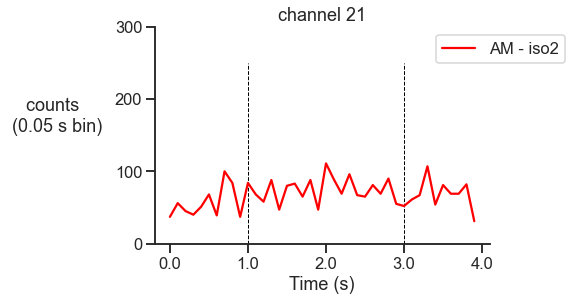

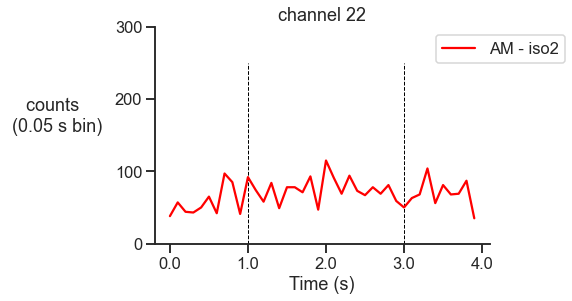

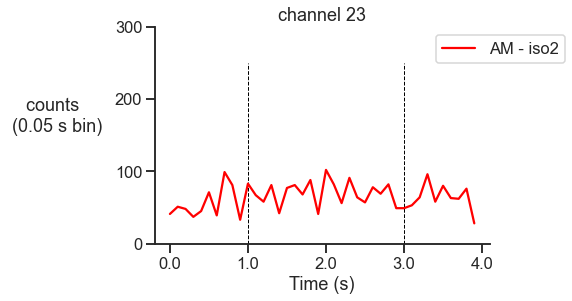

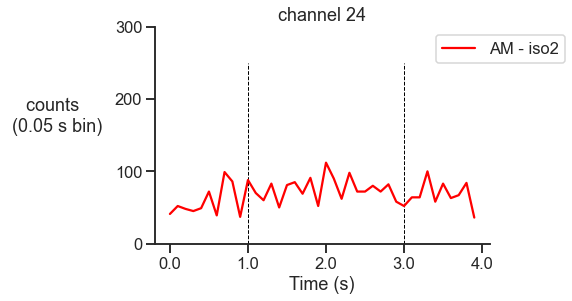

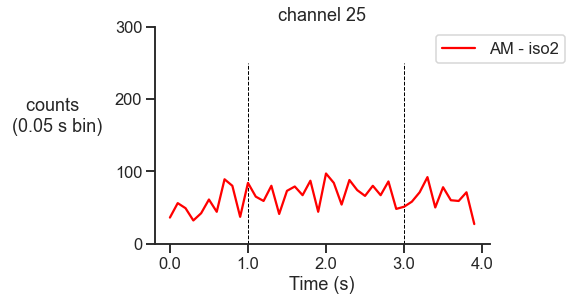

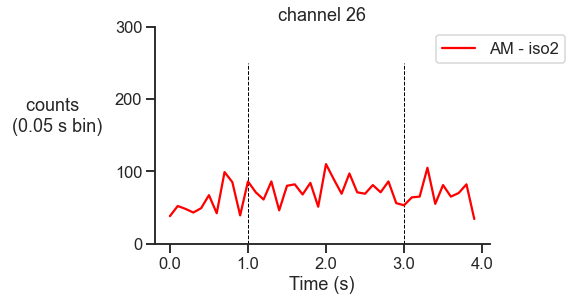

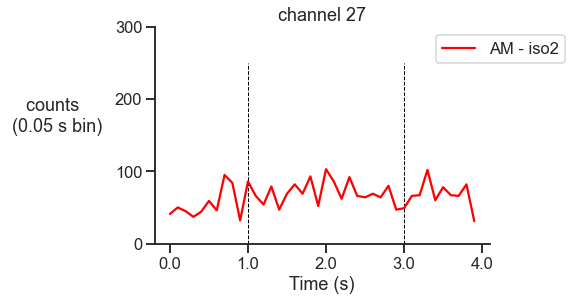

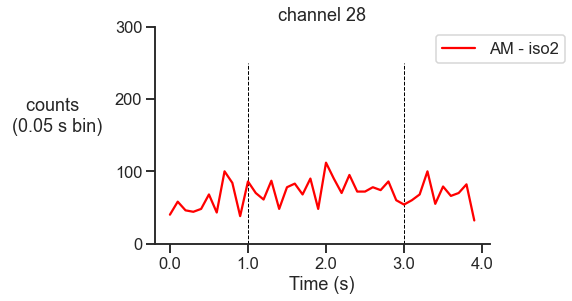

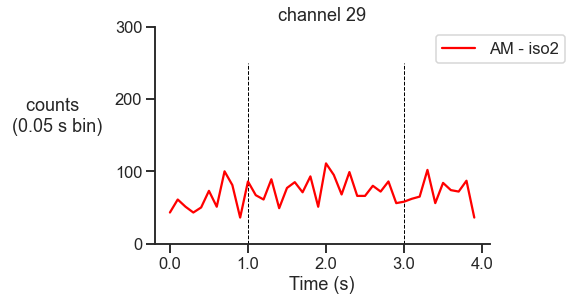

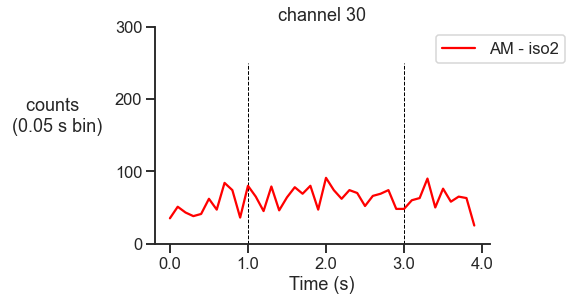

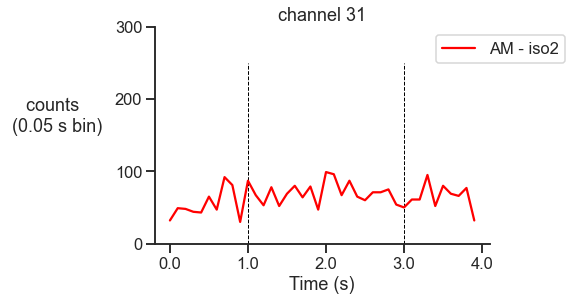

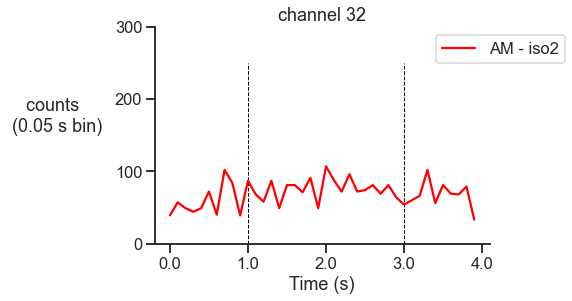

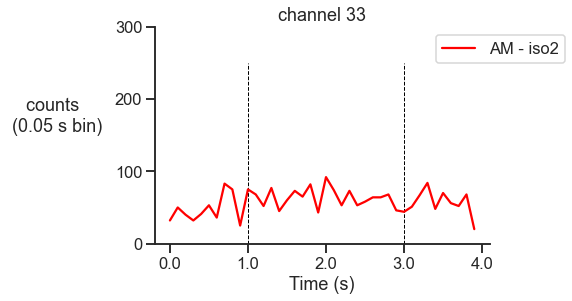

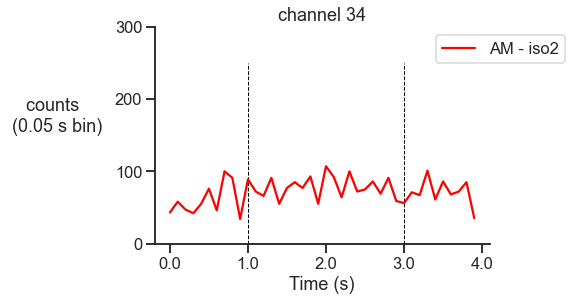

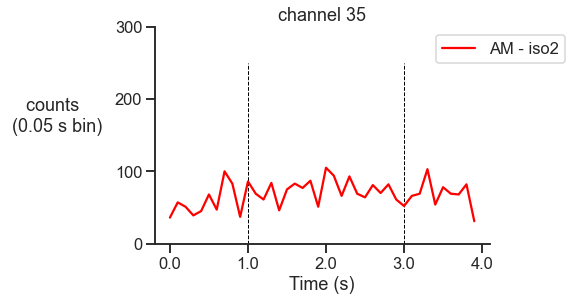

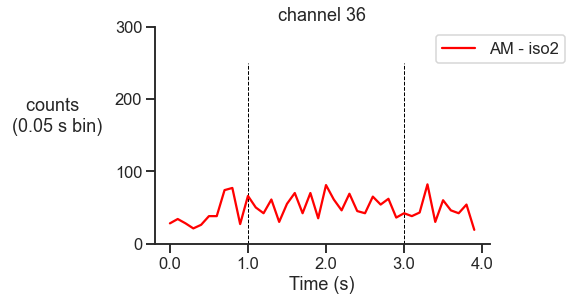

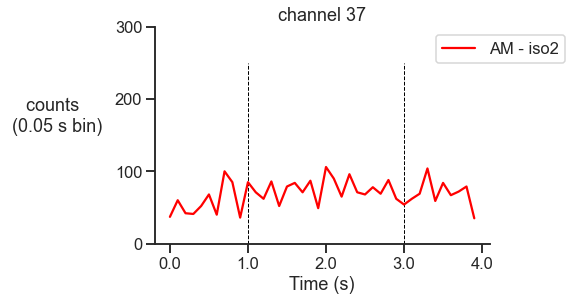

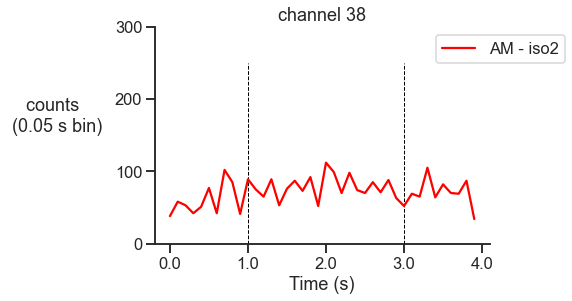

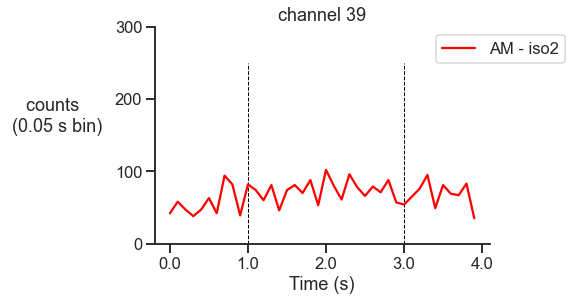

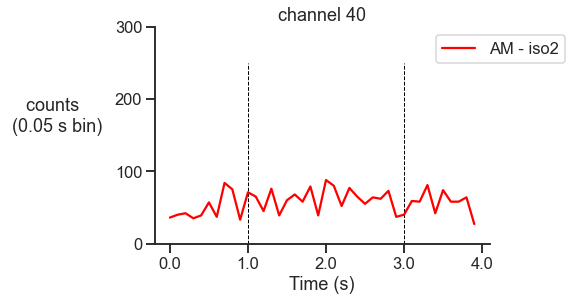

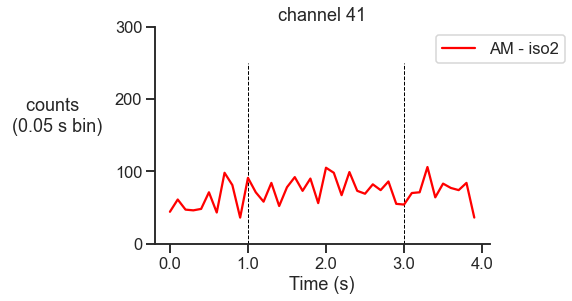

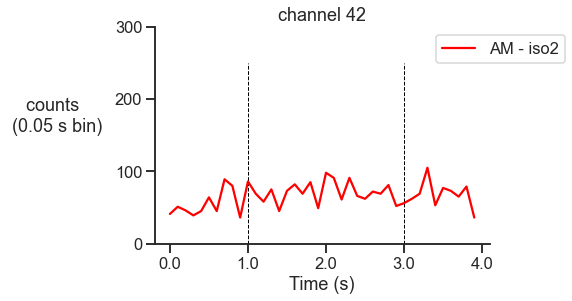

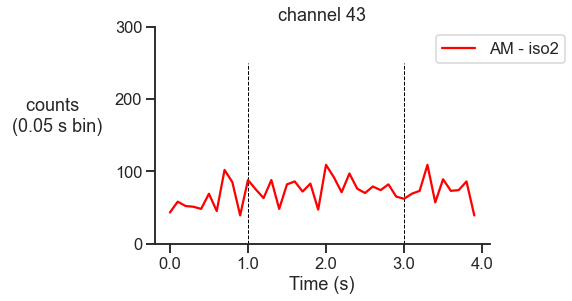

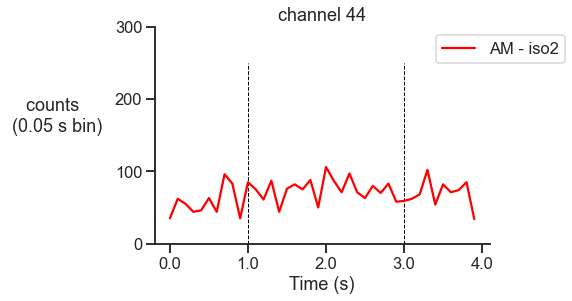

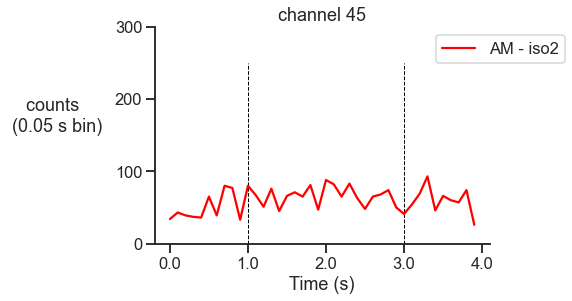

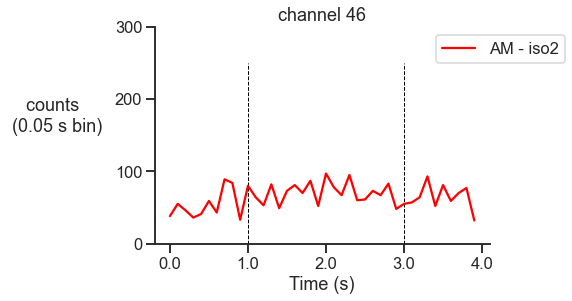

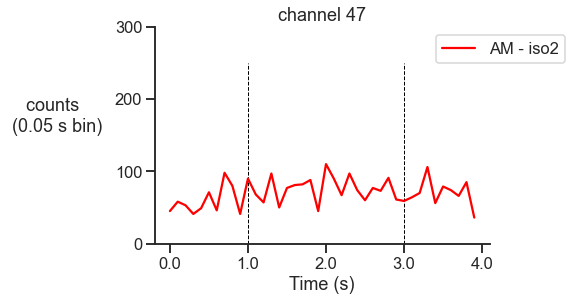

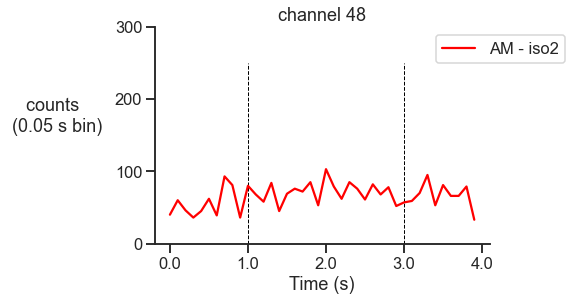

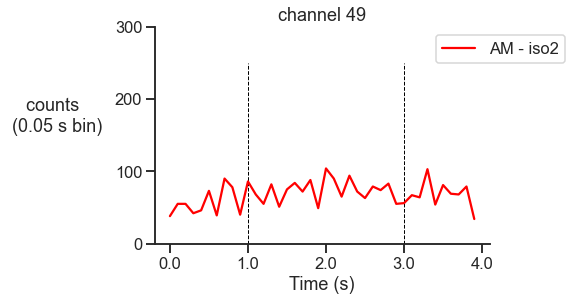

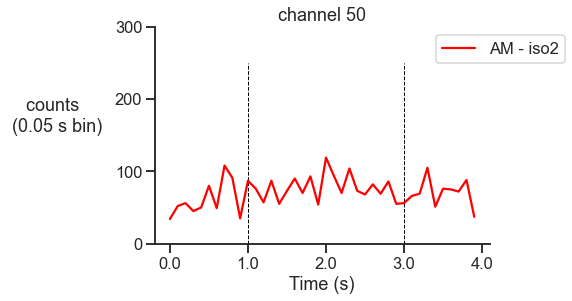

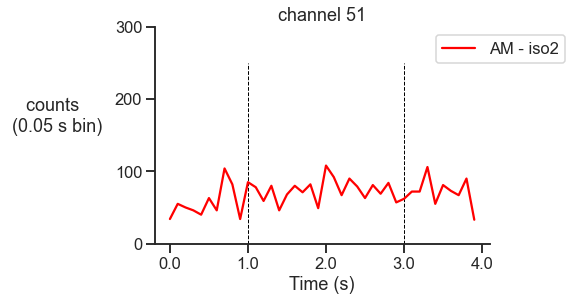

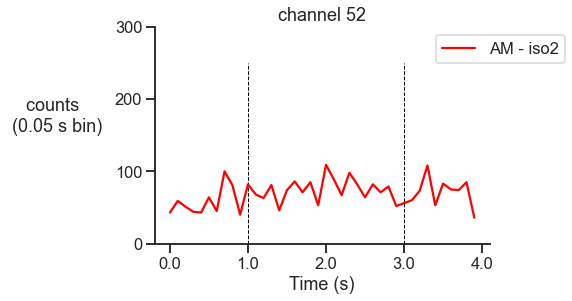

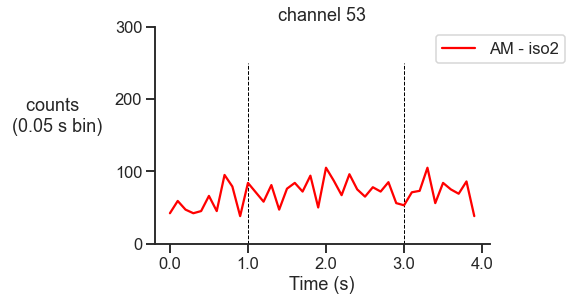

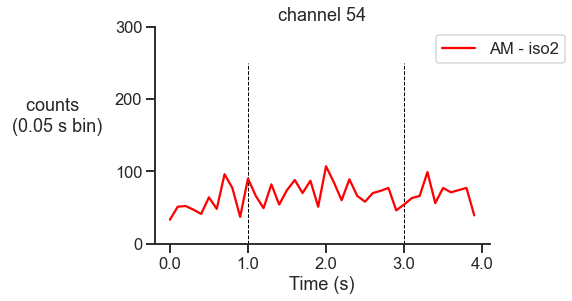

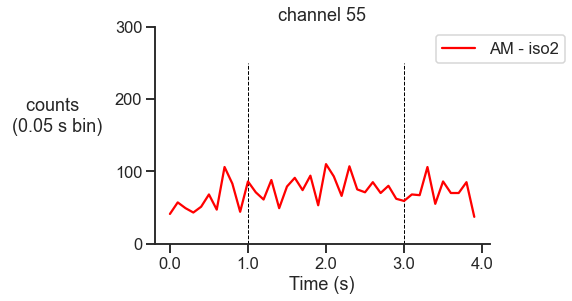

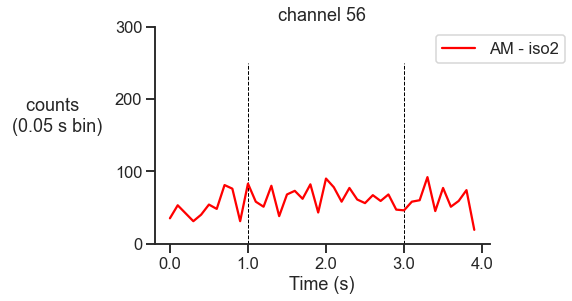

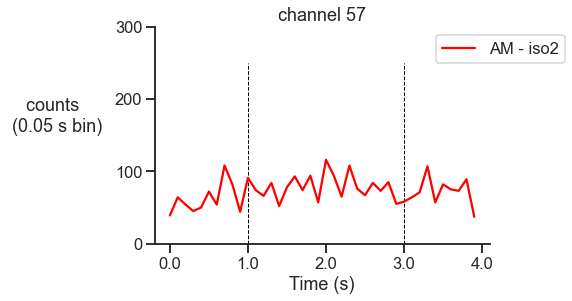

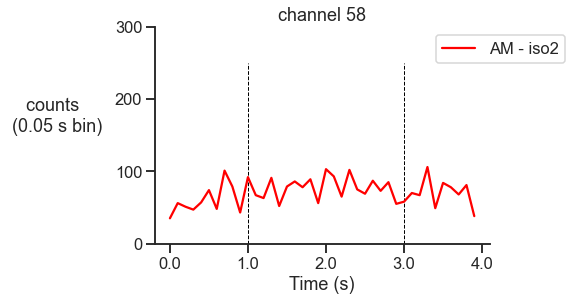

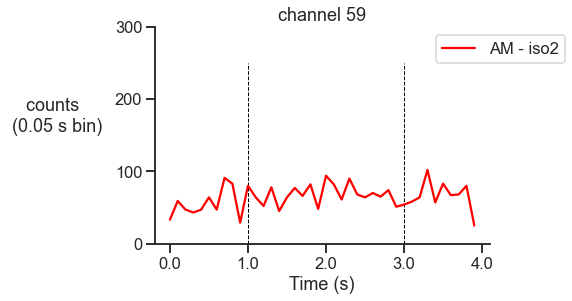

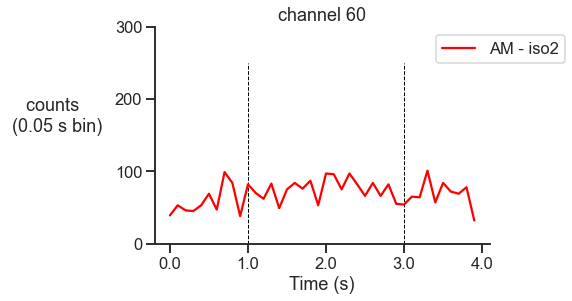

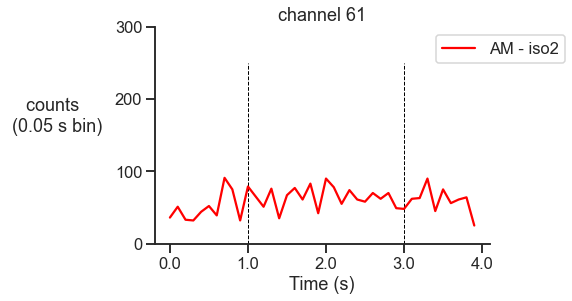

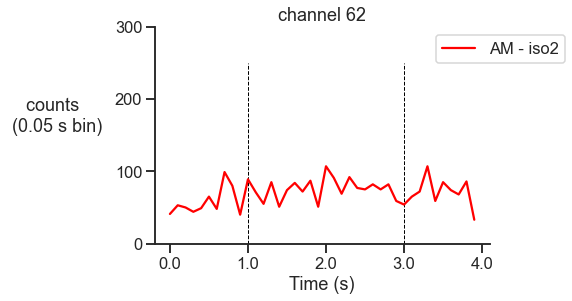

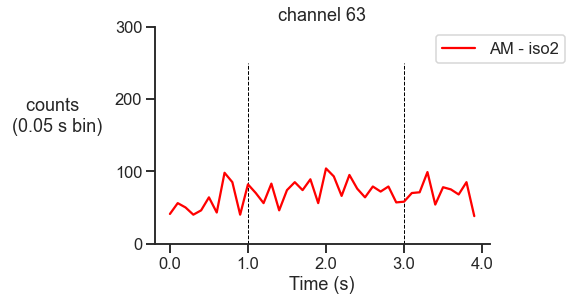

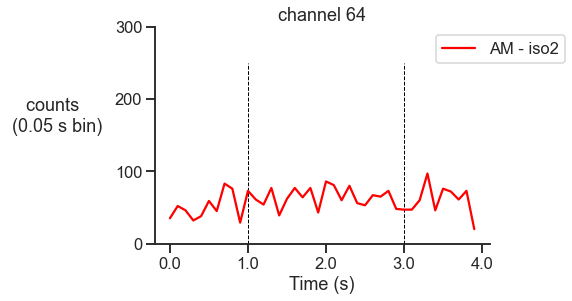

In [17]:
for i in range(64):
    figure()
   
    plot(psths_iso2[:,1][i][:-1], psths_iso2[:,0][i], label='AM - iso2', color='red', zorder=2) 

    
    ylim(-1,300)
    vlines(12500, 0, 250, linestyle='--', color='k', linewidth=1)
    vlines(12500*3, 0, 250, linestyle='--', color='k', linewidth=1)
    ylabel('counts \n (0.05 s bin)', rotation=0, labelpad=60)
    xticks(np.arange(0, psths_iso2[:,1][i][-1]+1, 12500),
           np.arange(0, psths_iso2[:,1][i][-1]+1, 12500)/12500)
    xlabel('Time (s)')
    legend(bbox_to_anchor=(1.25,1))
    title('channel {}'.format(i+1))
    sns.despine()